**Commodity Channel Index (CCI)**


---


The commodity channel index (CCI) is an oscillator which was originally introduced by Donald Lambert in 1980. CCI can be used to identify cyclical turns across asset classes, be it commodities, indices, stocks, or ETFs. CCI is also used by traders to identify overbought/oversold levels for securities.

**Estimation**

The CCI looks at the relationship between price and a moving average. Steps involved in the estimation of CCI include:

Computing the typical price for security. The typical price is obtained by the averaging the high, low and the close price for the day.
Finding the moving average for the chosen number of days based on the typical price.
Computing the standard deviation for the same period as that used for the MA.

The formula for CCI is given by:

**CCI** = (Typical price – MA of Typical price) / (0.015 * Standard deviation of Typical price)

The index is scaled by an inverse factor of 0.015 to provide for more readable numbers.

**Analysis**

CCI can be used to determine overbought and oversold levels. Readings above +100 can imply an overbought condition, while readings below −100 can imply an oversold condition. However, one should be careful because security can continue moving higher after the CCI indicator becomes overbought. Likewise, securities can continue moving lower after the indicator becomes oversold.

Whenever the security is in overbought/oversold levels as indicated by the CCI, there is a good chance that the price will see corrections. Hence a trader can use such overbought/oversold levels to enter in short/long positions.

Traders can also look for divergence signals to take suitable positions using CCI. A bullish divergence occurs when the underlying security makes a lower low and the CCI forms a higher low, which shows less downside momentum. Similarly, a bearish divergence is formed when the security records a higher high and the CCI forms a lower high, which shows less upside momentum.

**Python code for computing the Commodity Channel Index**

In the code below we use the Series, rollingmean, rollingstd, and the join functions to compute the Commodity Channel Index. The Series function is used to form a series which is a one-dimensional array-like object containing an array of data. The rollingmean function takes a time series or a data frame along with the number of periods and computes the mean. The rollingstd function computes the standard deviation based on the price provided. The join function joins a given series with a specified series/dataframe.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

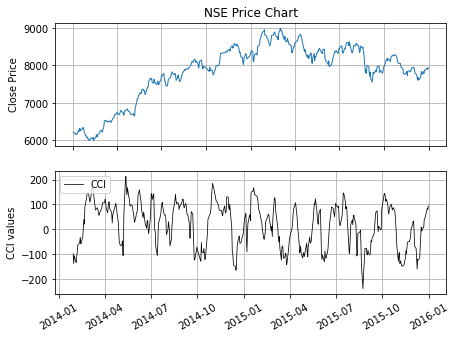

In [3]:
# Commodity Channel Index Python Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance
import pandas as pd

# Commodity Channel Index 
def CCI(data, n): 
    TP = (data['High'] + data['Low'] + data['Close']) / 3 
    CCI = pd.Series((TP - TP.rolling(n).mean()) / (0.015 * TP.rolling(n).std()),
                    name = 'CCI') 
    data = data.join(CCI) 
    return data

# Retrieve the Nifty data from Yahoo finance:
data = pdr.get_data_yahoo("^NSEI", start="2014-01-01", end="2016-01-01") 
data = pd.DataFrame(data)

# Compute the Commodity Channel Index(CCI) for NIFTY based on the 20-day Moving average
n = 20
NIFTY_CCI = CCI(data, n)
CCI = NIFTY_CCI['CCI']

# Plotting the Price Series chart and the Commodity Channel index below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('NSE Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(CCI,'k',lw=0.75,linestyle='-',label='CCI')
plt.legend(loc=2,prop={'size':9.5})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)